# Ensemble Techniques Project

## - Saif Merchant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, Normalizer
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

### 1

a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame
and assign it to a variable


In [2]:
data1 = pd.read_csv("C:/Users/SAIF MERCHANT/Desktop/Great Learning/Ensemble Techniques/Project/TelcomCustomer-Churn_1.csv")

In [3]:
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame
and assign it to a variable


In [4]:
data2 = pd.read_csv("C:/Users/SAIF MERCHANT/Desktop/Great Learning/Ensemble Techniques/Project/TelcomCustomer-Churn_2.csv",)

In [5]:
data2

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
data2.isnull().sum()

customerID          0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 c.Merge both the DataFrames on key ‘customerID’ to form
a single DataFrame


In [7]:
data = pd.merge(data1,data2,how = 'outer',on = 'customerID')

In [8]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


d.Verify if all the columns are incorporated in the merged
DataFrame by using simple comparisonOperator in Python

In [9]:
num_rows_data1, num_cols_data1 = data1.shape
num_rows_data, num_cols_data = data.shape

# As we have merged both data1 and dat2 on the basis of a common column (customer_ID), adding both shall
# give us an unnecessary exta column. And hence prior to building a conditional code, we shall eliminate
# the extra column.
data_new_2 = data2.drop('customerID',axis = 1)
num_rows_data2, num_cols_data2 = data_new_2.shape

# Adding the columns of data1 and new data2
addition_data1_and_data2_cols_excluding_extra_col = num_cols_data1 + num_cols_data2

while 1:
    if num_cols_data == addition_data1_and_data2_cols_excluding_extra_col:
        print('The number of columns in both (original dataframes and the merged ones) are equal')
        if num_rows_data == num_rows_data1 and num_rows_data == num_rows_data2:
            print('The number of rows in both (original dataframes and the merged ones) are equal')
            break
    else:
        print('Oops! They seem not equal')

The number of columns in both (original dataframes and the merged ones) are equal
The number of rows in both (original dataframes and the merged ones) are equal


#### 2

a Impute missing/unexpected values in the DataFrame

In [10]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Looks like there are no missing values, but lets be double sure about it

In [11]:
data['TotalCharges'] = data['TotalCharges'].str.strip()
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].replace(' ', np.nan, inplace=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [12]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
data['TotalCharges'].isnull().sum()

11

In [14]:
pd.DataFrame({'Count' : data.isnull().sum()[data.isnull().sum() > 0],
             'Percentage' : (data.isnull().sum()[data.isnull().sum() > 0]/data.shape[0])*100})


,Count,Percentage
TotalCharges,11,0.156183


#### The TotalCharges col has 11 missing values, before imputing them lets have a peek at the possible outliers

### Looking for Outliers if present

In [15]:
numerics = ['TotalCharges']
Q1 = data[numerics].quantile(0.25)
Q3 = data[numerics].quantile(0.75)

IQR = Q3 - Q1   

lower_whisker = Q1 - 1.5*IQR     
upper_whisker = Q3 + 1.5*IQR      

In [16]:
((data[numerics] < lower_whisker) | (data[numerics] > upper_whisker)).sum()/data.shape[0]*100

TotalCharges    0.0
dtype: float64

#### There seems to be no outliers in the data and as result Lets impute the missing values with Mean 

In [17]:
mean_value = data['TotalCharges'].mean()
data['TotalCharges'] = data['TotalCharges'].fillna(mean_value)

In [18]:
data['TotalCharges'].isnull().sum()

0

b Make sure all the variables with continuous values are of
‘Float’ type

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The columns {tenure, MonthlyCharges, TotalCharges} are continuous amongst which only tenure has int dataType. So lets change that!

In [21]:
data['tenure'] = data['tenure'].astype('float')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


c Create a function that will accept a DataFrame as input
and return pie-charts for all theappropriate Categorical
features. Clearly show percentage distribution in the
pie-chart.


#### Note: The plot might take 1-2 mins to load!                        

In [23]:
def generate_pie_charts(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            value_counts = dataframe[column].value_counts()
            total_count = len(dataframe[column])
            
            percentages = [(count / total_count) * 100 for count in value_counts]
            labels = value_counts.index

            plt.figure(figsize=(6, 6))
            plt.style.use('default')
            plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
            plt.title(f'{column} - Percentage Distribution')
            plt.axis('equal')
            plt.show()


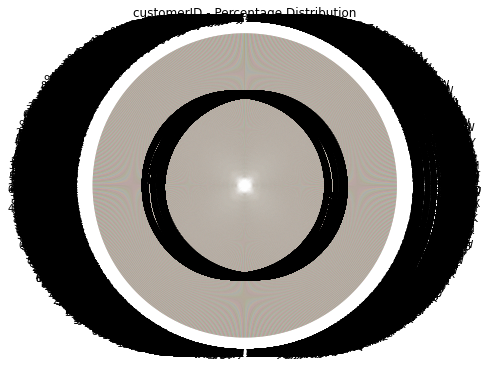

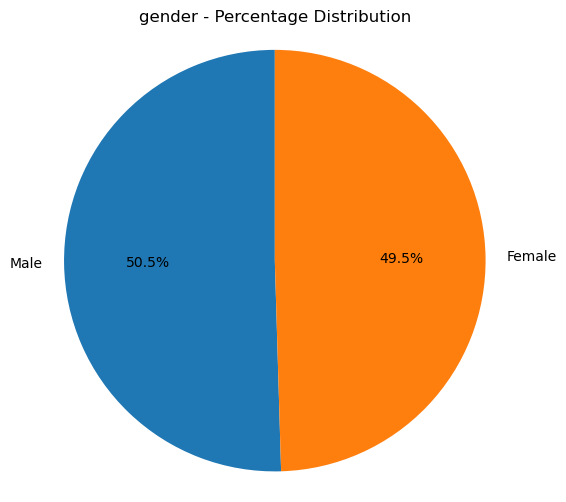

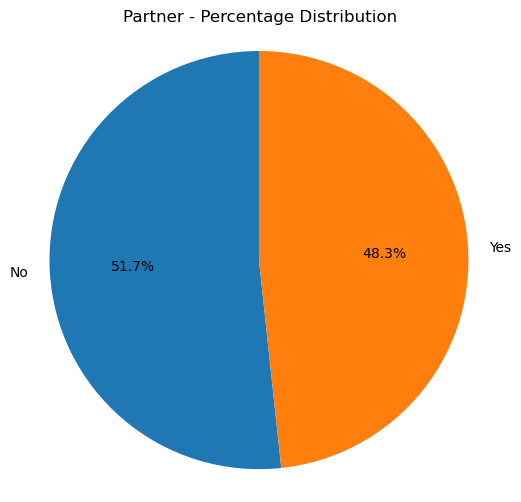

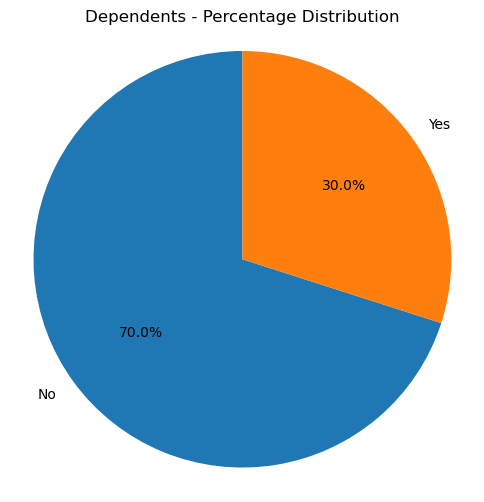

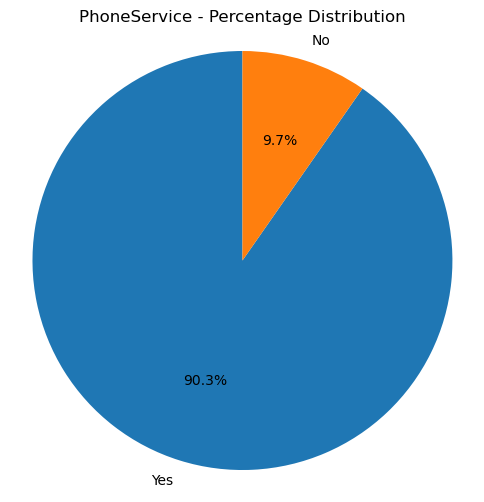

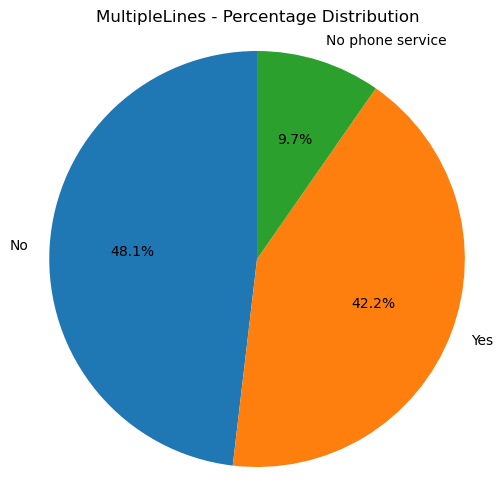

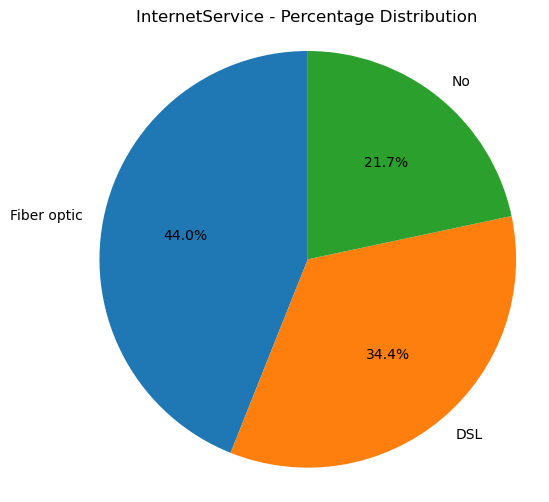

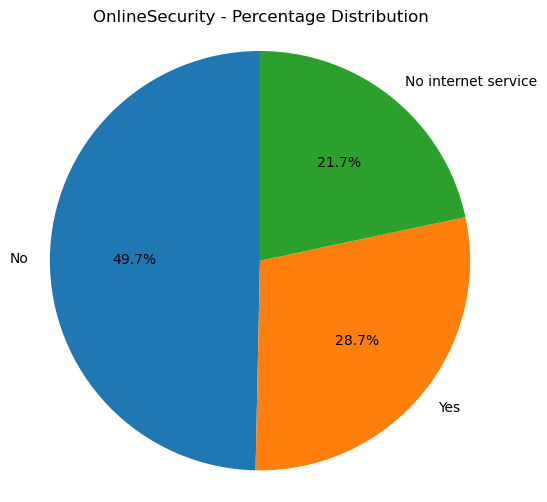

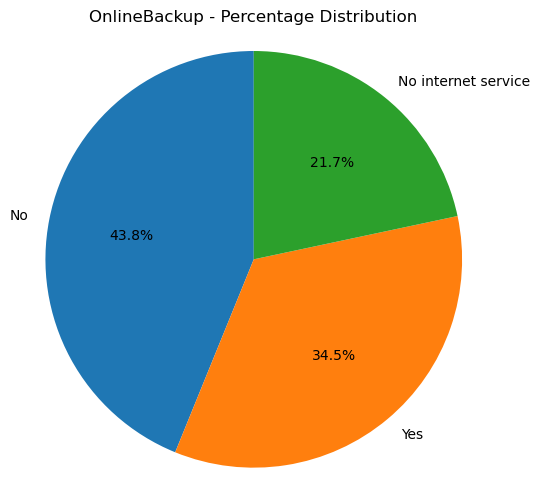

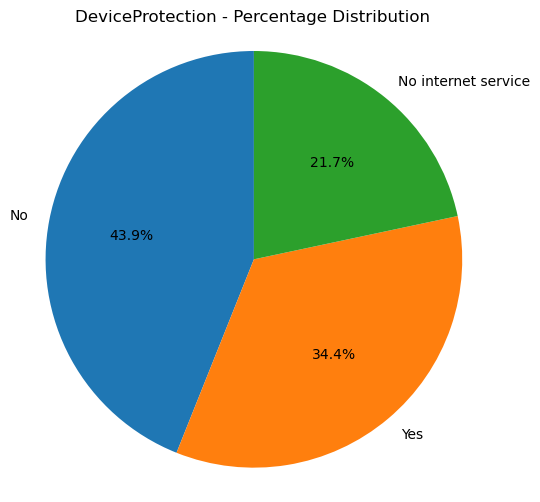

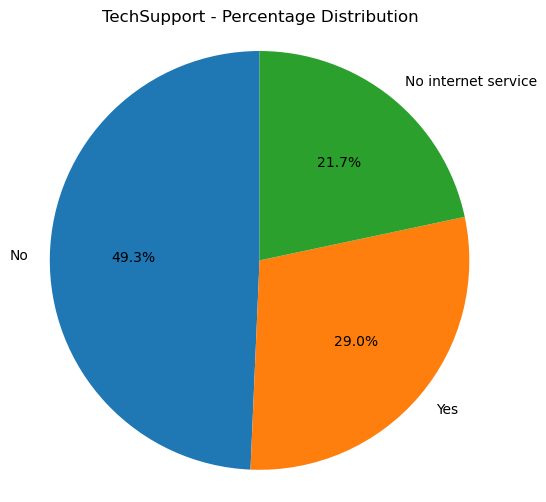

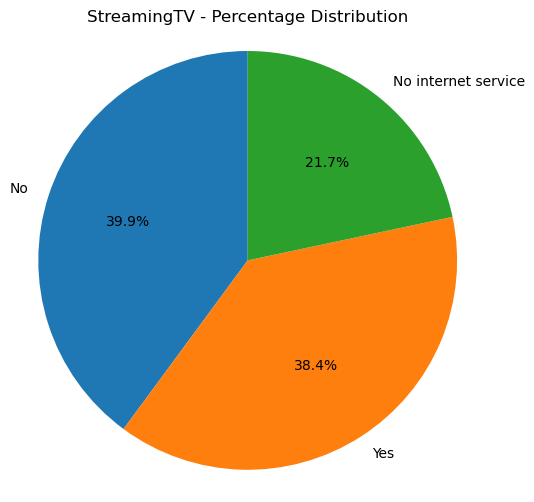

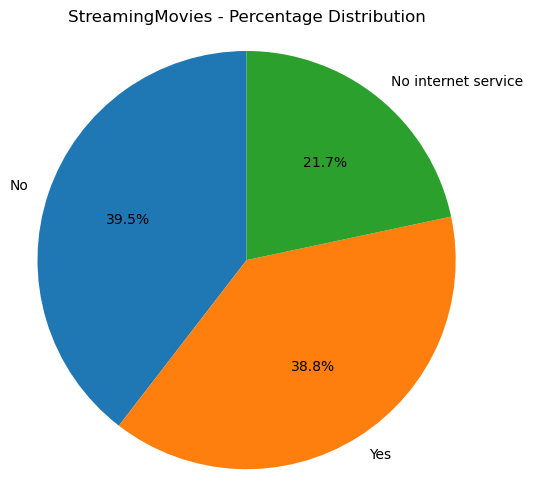

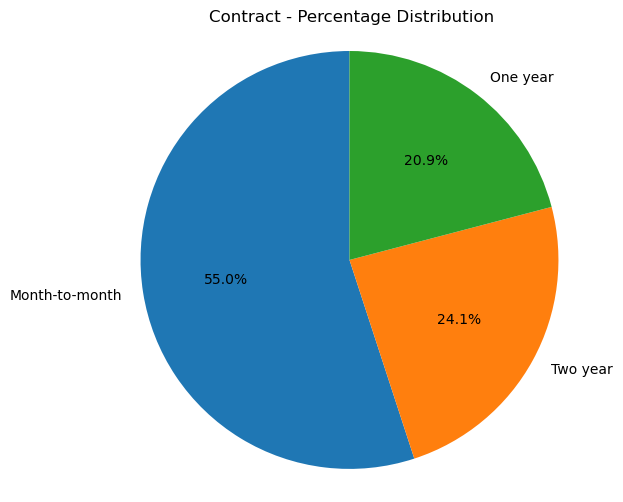

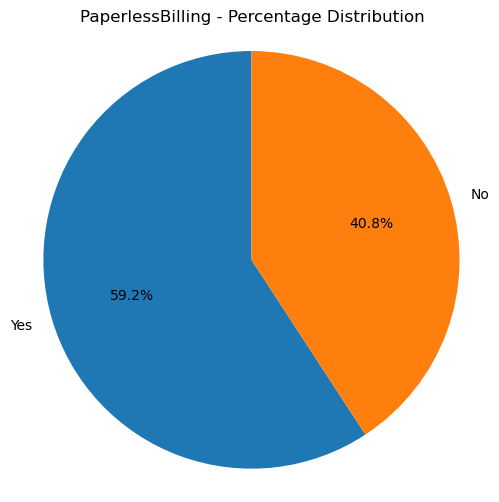

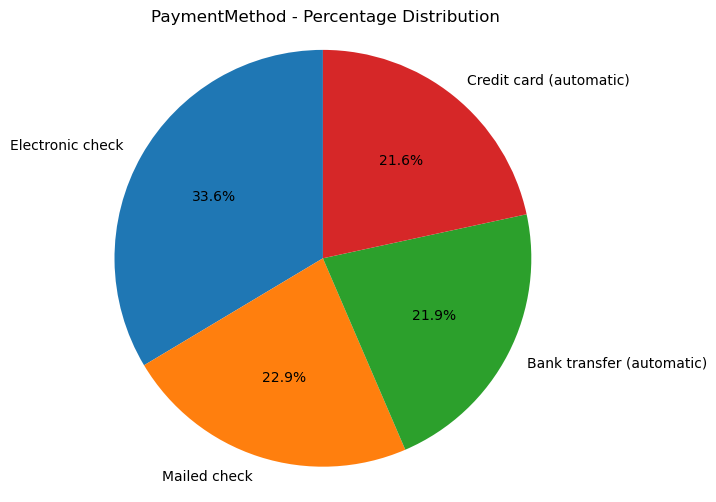

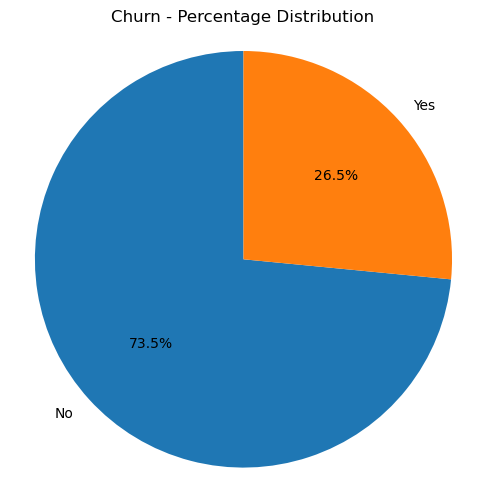

In [24]:
generate_pie_charts(data)

d.Share insights for Q2.c

### Insights : 
* Gender: Men and women make up equally large portions of the population, with about half (49.5%) of people being female and nearly half (50.5%) of people being male.
Dependents: The vast majority of people (70%) are responsible for others, such as young children or elderly parents.
* Phone service: The majority of people (90.3%) have access to a phone, and the majority of those (42.2%) have numerous lines.
* Internet service provider: DSL (34.4%) and fibre optic (44.0%) are the two most popular options.
* Tech help: The majority of individuals (71.3%) do not have access to tech support, hence there may be a market for businesses that provide this service.
* Online security: The majority of consumers (50.3%) lack online security, which could be a danger for organisations to take into account.
* Streaming TV: A sizable portion of the population (28.7%) uses streaming TV, which presents a chance for companies to provide streaming TV subscriptions or content.
* Streaming movies: A sizable portion of people (28.7%) watch streaming movies, indicating a growing demand for them.
* Type of contract: The majority of consumers (60.7%) choose month-to-month agreements, which may indicate that they want flexibility in the services they receive.
* The majority (62.2%) of consumers choose paperless billing, which may indicate that they value environmental sustainability and simplicity.
* Payment method: The majority of people (58.5%) use credit cards to pay their bills, which may indicate that consumers are at ease using this technique.
* Churn rate: The high (22.7%) churn rate may indicate that companies need to strengthen their client retention tactics.
* Please disregard the customer_it pie chart, which was constructed improperly because it is also an object data type.

e.Encode all the appropriate Categorical features with the
best suitable approach


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
data['customerID'].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Instead of assigning 7043 unique dummies, lets delete the customerID Col 

In [27]:
data = data.drop('customerID',axis = 1)

In [28]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
print(data.gender.value_counts())
print('------------------')
print(data.Partner.value_counts())
print('------------------')
print(data.Dependents.value_counts())
print('------------------')
print(data.PhoneService.value_counts())
print('------------------')
print(data.MultipleLines.value_counts())
print('------------------')
print(data.InternetService.value_counts())
print('------------------')
print(data.OnlineSecurity.value_counts())
print('------------------')
print(data.OnlineBackup.value_counts())
print('------------------')
print(data.DeviceProtection.value_counts())
print('------------------')
print(data.TechSupport.value_counts())
print('------------------')
print(data.StreamingTV.value_counts())
print('------------------')
print(data.StreamingMovies.value_counts())
print('------------------')
print(data.Contract.value_counts())
print('------------------')
print(data.PaperlessBilling.value_counts())
print('------------------')
print(data.PaymentMethod.value_counts())
print('------------------')
print(data.Churn.value_counts())
print('------------------')

Male      3555
Female    3488
Name: gender, dtype: int64
------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
------------------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
------------------
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
------------------
No                     3473
Yes               

There are numerous categorical variables, and encoding them all would significantly increase the size and complexity of our data, which would ultimately hamper the building of our model. Therefore, in this situation, we begin by encoding the columns with just two unique values and substituting the variables with more than two unique variables with the numbers 0, 1, 2, 3, etc. 
* Note that there is no rank or little or huge status indicated by the integer flow, which only shows the allocated category. 

In [30]:
replaceStruct = {
                "MultipleLines":     {"Yes": 1, "No": 2 ,"No phone service": 3},
                "InternetService": {"Fiber optic": 1, "DSL":2 , "No": 3},
                 "OnlineSecurity": {"Yes": 1, "No": 2 ,"No internet service": 3},
                "OnlineBackup": {"Yes": 1, "No": 2 ,"No internet service": 3},
                "DeviceProtection": {"Yes": 1, "No": 2 ,"No internet service": 3},
                "TechSupport": {"Yes": 1, "No": 2 ,"No internet service": 3},
                "StreamingTV": {"Yes": 1, "No": 2 ,"No internet service": 3},
                "StreamingMovies": {"Yes": 1, "No": 2 ,"No internet service": 3},
                "Contract":     {"Month-to-month": 3, "Two year": 2 ,"One year": 1},
                "PaymentMethod":  {"Electronic check": 1, "Mailed check": 2 
                                   ,"Bank transfer (automatic)": 3,"Credit card (automatic)" : 4},
                "Churn":     {"No": 0, "Yes": 1 }
}
data=data.replace(replaceStruct)

In [31]:
print(data.MultipleLines.value_counts())
print('------------------')
print(data.InternetService.value_counts())
print('------------------')
print(data.OnlineSecurity.value_counts())
print('------------------')
print(data.OnlineBackup.value_counts())
print('------------------')
print(data.DeviceProtection.value_counts())
print('------------------')
print(data.TechSupport.value_counts())
print('------------------')
print(data.StreamingTV.value_counts())
print('------------------')
print(data.StreamingMovies.value_counts())
print('------------------')
print(data.Contract.value_counts())
print('------------------')
print(data.PaymentMethod.value_counts())
print('------------------')
print(data.Churn.value_counts())
print('------------------')

2    3390
1    2971
3     682
Name: MultipleLines, dtype: int64
------------------
1    3096
2    2421
3    1526
Name: InternetService, dtype: int64
------------------
2    3498
1    2019
3    1526
Name: OnlineSecurity, dtype: int64
------------------
2    3088
1    2429
3    1526
Name: OnlineBackup, dtype: int64
------------------
2    3095
1    2422
3    1526
Name: DeviceProtection, dtype: int64
------------------
2    3473
1    2044
3    1526
Name: TechSupport, dtype: int64
------------------
2    2810
1    2707
3    1526
Name: StreamingTV, dtype: int64
------------------
2    2785
1    2732
3    1526
Name: StreamingMovies, dtype: int64
------------------
3    3875
2    1695
1    1473
Name: Contract, dtype: int64
------------------
1    2365
2    1612
3    1544
4    1522
Name: PaymentMethod, dtype: int64
------------------
0    5174
1    1869
Name: Churn, dtype: int64
------------------


In [32]:
oneHotCols=["gender","Partner","Dependents","PhoneService","PaperlessBilling"]
new_data=pd.get_dummies(data, columns=oneHotCols)

In [33]:
new_data

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0,1.0,3,2,2,1,2,2,2,2,...,1,0,0,1,1,0,1,0,0,1
1,0,34.0,2,2,1,2,1,2,2,2,...,0,1,1,0,1,0,0,1,1,0
2,0,2.0,2,2,1,1,2,2,2,2,...,0,1,1,0,1,0,0,1,0,1
3,0,45.0,3,2,1,2,1,1,2,2,...,0,1,1,0,1,0,1,0,1,0
4,0,2.0,2,1,2,2,2,2,2,2,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24.0,1,2,1,2,1,1,1,1,...,0,1,0,1,0,1,0,1,0,1
7039,0,72.0,1,1,2,1,1,2,1,1,...,1,0,0,1,0,1,0,1,0,1
7040,0,11.0,3,2,1,2,2,2,2,2,...,1,0,0,1,0,1,1,0,0,1
7041,1,4.0,1,1,2,2,2,2,2,2,...,0,1,0,1,1,0,0,1,0,1


 f.Split the data into 80% train and 20% test. 

In [34]:
x = new_data.drop('Churn',axis = 1)
y = new_data['Churn']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

g.Normalize/Standardize the data with the best suitable
approach

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.fit_transform(x_test)

### 3

a Train a model using Decision tree and check the
performance of the model on train and test data


In [37]:
initial_decision_tree_model = DecisionTreeClassifier(random_state = 42)
initial_decision_tree_model.fit(x_train_normalized,y_train) 

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred_decision_tree_initial = initial_decision_tree_model.predict(x_test_normalized)

###### 1 : Scores of training and Testing Data

In [39]:
print('Score for Training Data : ',round(initial_decision_tree_model.score(x_train_normalized,y_train),3))
print(' ')
print('Score for Testing Data : ',round(initial_decision_tree_model.score(x_test_normalized,y_test),3))

Score for Training Data :  0.999
 
Score for Testing Data :  0.735


###### 2 :  Accuracy

In [40]:
print(accuracy_score(y_test,y_pred_decision_tree_initial))

0.7345635202271115


In [41]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [42]:
pred_vs_actual_model_initial_decision_tree = rightly_identified(y_test, y_pred_decision_tree_initial)

In [43]:
pred_vs_actual_model_initial_decision_tree

,total_instances,identified_right,%
0,1036.0,852.0,82.2
1,373.0,183.0,49.1


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [44]:
print(classification_report(y_test,y_pred_decision_tree_initial))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.49      0.49       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



###### 4 : Confusion Matrix

### For Test Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


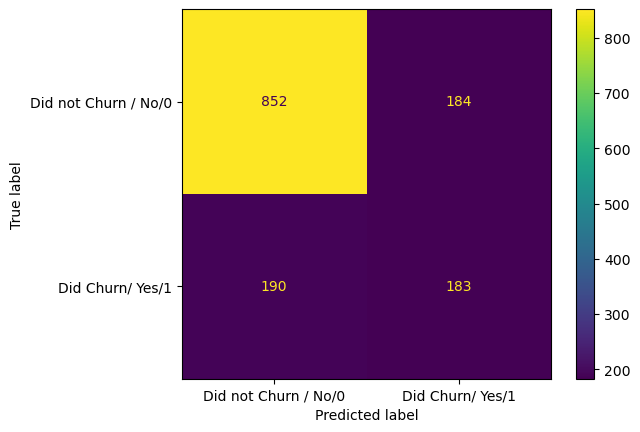

In [45]:
 plot_confusion_matrix(initial_decision_tree_model,x_test_normalized,
               y_test,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### For Train Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


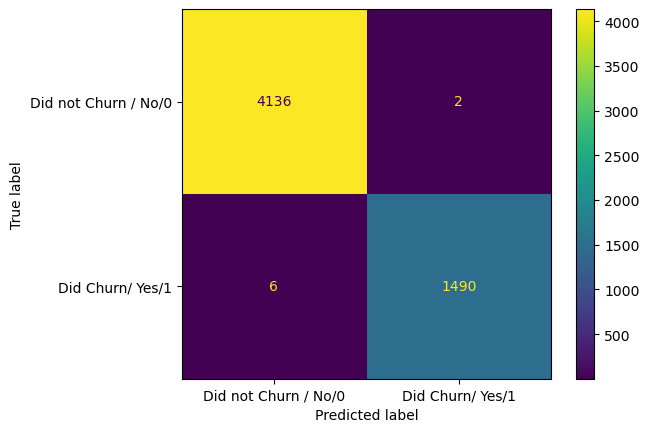

In [46]:
 plot_confusion_matrix(initial_decision_tree_model,x_train_normalized,
               y_train,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

.b Use grid search and improve the performance of the
Decision tree model , check the performance of the model on
train and test data , provide the differences observed in
performance in Q3.a and Q3.b


    We will proceed with the model utilising the Cost complexity pruning strategy after conducting a personal analysis using the Gini impurity, entropy, and Cost complexity pruning strategies to determine that cost complexity pruning performed the best for 
    this model.

#### Note :
               
    The size of samples is huge and as Cost Complexity Pruning is a hectic procedure, 
    the processing time of the crossvalidation/Gridsearch might take some time
    ( particularly between 1 min - 2 min)

In [48]:
path = initial_decision_tree_model.cost_complexity_pruning_path(x_train_normalized, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

dfs = [] 

for alpha in ccp_alphas:
    df = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    df.fit(x_train_normalized, y_train)
    dfs.append(df)

In [49]:
alpha_loop_values = []  

for ccp_alpha in ccp_alphas:
    df = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(df, x_train_normalized, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

parameter_grid = {
    'ccp_alpha': alpha_results['alpha'].values 
}
optimal_parameters = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid=parameter_grid,
    cv=5,
    scoring='accuracy',
    verbose=0,
)
optimal_parameters.fit(x_train_normalized, y_train)
print(optimal_parameters.best_params_)

{'ccp_alpha': 0.0007639144334447229}


#### Lets visualize our Alphas values

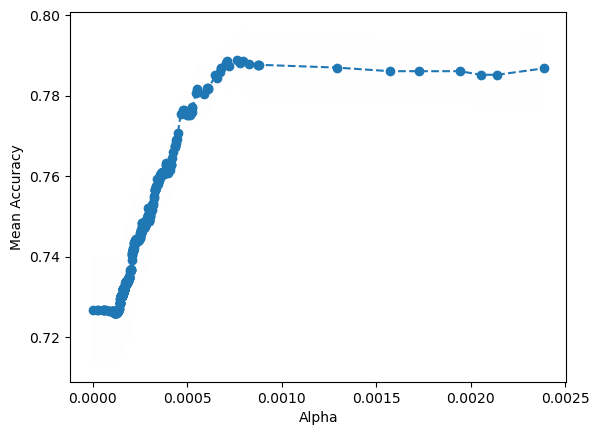

In [50]:
alpha_results1 = alpha_results[alpha_results['alpha'] <= 0.0025]

plt.plot(alpha_results1['alpha'], alpha_results1['mean_accuracy'], marker='o', ls='--')
plt.fill_between(
    alpha_results1['alpha'],
    alpha_results1['mean_accuracy'] - alpha_results1['std'],
    alpha_results1['mean_accuracy'] + alpha_results1['std'],
    alpha=0.0025,
    color='gray',
)
plt.xlabel('Alpha')
plt.ylabel('Mean Accuracy')
plt.show()


#### Finding the max_depth for our Final Model

#### Note :
               
    The size of samples is huge and as Cost Complexity Pruning is a hectic procedure, 
    the processing time of the crossvalidation/Gridsearch might take some time
    ( particularly between 1 min - 2 min)

In [51]:
max_depth_values = np.arange(1, 21)

gini_loop_values = []

for max_depth_val in max_depth_values:
    df = DecisionTreeClassifier(random_state=0, criterion='gini',ccp_alpha= 0.0007639144334447229,
                                max_depth=max_depth_val)
    scores = cross_val_score(df, x_train_normalized, y_train, cv=5)
    gini_loop_values.append([max_depth_val, np.mean(scores), np.std(scores)])

gini_results = pd.DataFrame(gini_loop_values, columns=['max_depth', 'mean_accuracy', 'std'])

parameter_grid = {
    'max_depth': gini_results['max_depth'].values  # Convert to a numpy array using .values
}

optimal_parameters = GridSearchCV(
    DecisionTreeClassifier(random_state=0, criterion='gini'),  # Initialize the estimator here with criterion='gini'
    param_grid=parameter_grid,
    cv=5,
    scoring='accuracy',
    verbose=0,
)
optimal_parameters.fit(x_train_normalized, y_train)

print("Optimal hyperparameters using Gini Impurity and ccp_alpha:")
print(optimal_parameters.best_params_)


Optimal hyperparameters using Gini Impurity and ccp_alpha:
{'max_depth': 5}


#### Note :
               
    The size of samples is huge and the processing time of the crossvalidation/
    Gridsearch might take some time ( particularly between 15 min - 20 min)

In [52]:
rf_estimator_weighted = RandomForestClassifier(random_state = 42,
                                              max_depth = 5, criterion = 'gini',
                                               ccp_alpha = 0.0007639144334447229)

parameters = {
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1)}
scorer = metrics.make_scorer(metrics.recall_score)

grid_search = GridSearchCV(rf_estimator_weighted, parameters, scoring=scorer,cv=5)
grid_search = grid_search.fit(x_train_normalized, y_train)

final_model = grid_search.best_estimator_
final_model.fit(x_train_normalized, y_train)

RandomForestClassifier(ccp_alpha=0.0007639144334447229, max_depth=5,
                       max_features=0.6000000000000001, min_samples_leaf=9,
                       random_state=42)

In [53]:
final_decision_tree_model = final_model

In [54]:
y_pred_final = final_decision_tree_model.predict(x_test_normalized)

###### 1 : Scores of training and Testing Data

In [55]:
print('Score for Training Data : ',round(final_decision_tree_model.score(x_train_normalized,y_train),3))
print(' ')
print('Score for Testing Data : ',round(final_decision_tree_model.score(x_test_normalized,y_test),3))

Score for Training Data :  0.802
 
Score for Testing Data :  0.806


###### 2 :  Accuracy

In [56]:
print(accuracy_score(y_test,y_pred_final))

0.8055358410220014


In [57]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [58]:
pred_vs_actual_model_final_decision_tree = rightly_identified(y_test, y_pred_final)

In [59]:
pred_vs_actual_model_final_decision_tree

,total_instances,identified_right,%
0,1036.0,949.0,91.6
1,373.0,186.0,49.9


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [60]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.81      0.79      1409



###### 4 : Confusion Matrix

### For Test Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


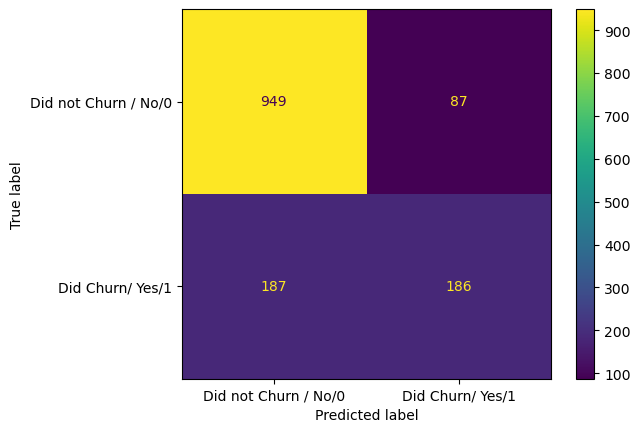

In [61]:
 plot_confusion_matrix(final_decision_tree_model,x_test_normalized,
               y_test,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### For Train Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


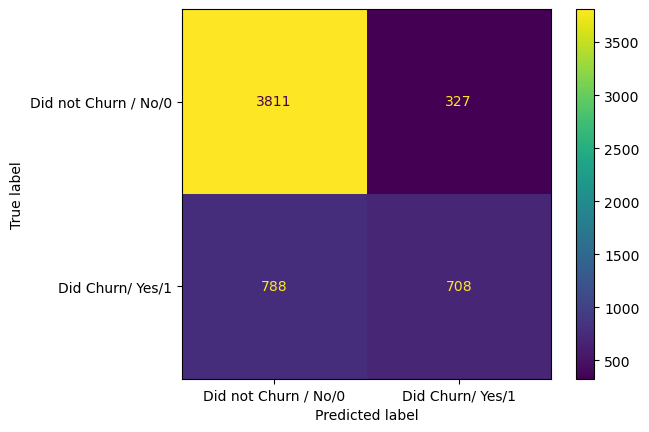

In [62]:
 plot_confusion_matrix(final_decision_tree_model,x_train_normalized,
               y_train,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### Difference between both the models

In [63]:
result = {}

result['Initial Decision Tree Model'] = pred_vs_actual_model_initial_decision_tree.drop(columns= 'total_instances')
result['Final Decision Tree Model'] = pred_vs_actual_model_final_decision_tree.drop(columns= 'total_instances')

In [64]:
pd.concat(result, axis = 1)

Initial Decision Tree Model       Final Decision Tree Model      
             identified_right     %          identified_right     %
0                       852.0  82.2                     949.0  91.6
1                       183.0  49.1                     186.0  49.9

### Insights
* A quick glance at the correctly recognised components shows that the Final model outperformed the Initial Model.
* The additional diagnosis revealed that the Initial model performed excellently for Train Data but poorly for Test Data, indicating that the model was favoured and overfit, which ultimately meant that the Initial model had larger Variance.
* We were able to make the model less overfit, achieve better scores for both the train and test data, and construct a better decision tree overall after discovering the Optimal Value for alpha for Cost Complexity Pruning,min_samples_leaf,max_features and even the max_depth.   
* Quick observations shows that the tree's size decreased.

#### 3

c Train a model using Random forest and check the
performance of the model on train and test data


In [65]:
initial_random_forest_model = RandomForestClassifier(random_state = 1)
initial_random_forest_model = initial_random_forest_model.fit(x_train_normalized,y_train)

In [66]:
y_pred_random_forest_initial = initial_random_forest_model.predict(x_test_normalized)

###### 1 : Scores of training and Testing Data

In [67]:
print('Score for Training Data : ',round(initial_random_forest_model.score(x_train_normalized,y_train),3))
print(' ')
print('Score for Testing Data : ',round(initial_random_forest_model.score(x_test_normalized,y_test),3))

Score for Training Data :  0.999
 
Score for Testing Data :  0.794


###### 2 :  Accuracy

In [68]:
print(accuracy_score(y_test,y_pred_random_forest_initial))

0.794180269694819


In [69]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [70]:
pred_vs_actual_model_random_forest_initial = rightly_identified(y_test, y_pred_random_forest_initial)

In [71]:
pred_vs_actual_model_random_forest_initial

,total_instances,identified_right,%
0,1036.0,942.0,90.9
1,373.0,177.0,47.5


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [72]:
print(classification_report(y_test,y_pred_random_forest_initial))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



###### 4 : Confusion Matrix

### For Test Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


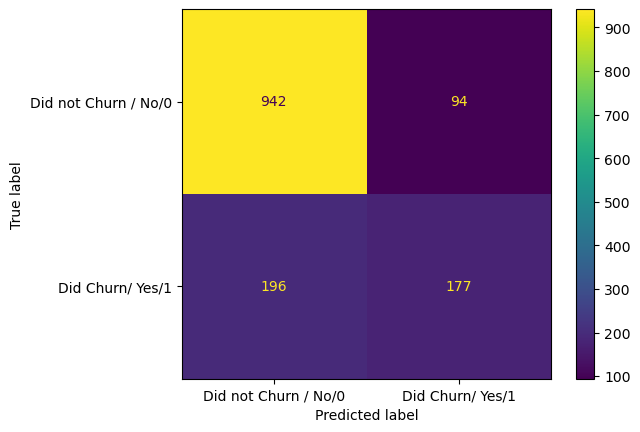

In [73]:
 plot_confusion_matrix(initial_random_forest_model,x_test_normalized,
               y_test,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### For Train Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


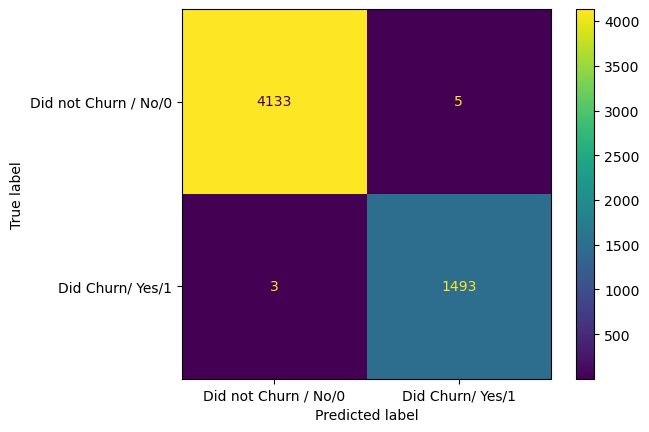

In [74]:
 plot_confusion_matrix(initial_random_forest_model,x_train_normalized,
               y_train,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

d Use grid search and improve the performance of the
Random tree model , check the performance of the model on
train and test data , provide the differences observed in
performance in Q3.c and Q3.d

#### Note :
               
    The size of samples is huge so the processing time of the crossvalidation/
    Gridsearch might take some time ( particularly between 15 min - 20 min)

In [75]:
rf_estimator_weighted = RandomForestClassifier(random_state = 42)

parameters = {"class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1)}
scorer = metrics.make_scorer(metrics.recall_score)

grid_search = GridSearchCV(rf_estimator_weighted, parameters, scoring=scorer,cv=5)
grid_search = grid_search.fit(x_train_normalized, y_train)

rf_estimator_weighted = grid_search.best_estimator_
rf_estimator_weighted.fit(x_train_normalized, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.2,
                       max_samples=0.4, min_samples_leaf=9, random_state=42)

In [76]:
final_random_forest_model = rf_estimator_weighted

In [77]:
y_pred_random_forest_final = final_random_forest_model.predict(x_test_normalized)

###### 1 : Scores of training and Testing Data

In [78]:
print('Score for Training Data : ',round(final_random_forest_model.score(x_train_normalized,y_train),3))
print(' ')
print('Score for Testing Data : ',round(final_random_forest_model.score(x_test_normalized,y_test),3))

Score for Training Data :  0.802
 
Score for Testing Data :  0.796


###### 2 :  Accuracy

In [79]:
print(accuracy_score(y_test,y_pred_random_forest_final))

0.7963094393186657


In [80]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [81]:
pred_vs_actual_model_random_forest_final = rightly_identified(y_test, y_pred_random_forest_final)

In [82]:
pred_vs_actual_model_random_forest_final

,total_instances,identified_right,%
0,1036.0,836.0,80.7
1,373.0,286.0,76.7


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [83]:
print(classification_report(y_test,y_pred_random_forest_final))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85      1036
           1       0.59      0.77      0.67       373

    accuracy                           0.80      1409
   macro avg       0.75      0.79      0.76      1409
weighted avg       0.82      0.80      0.80      1409



###### 4 : Confusion Matrix

### For Test Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


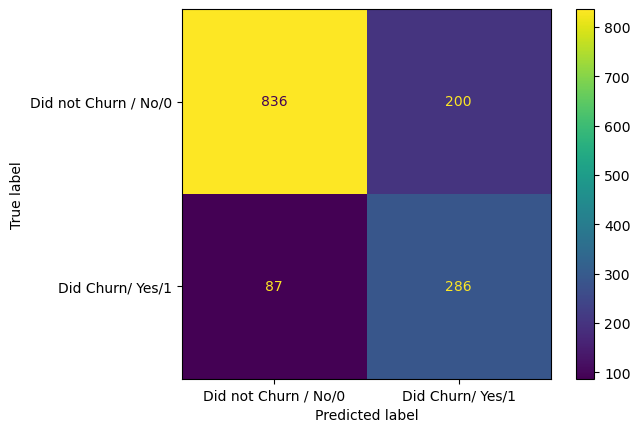

In [84]:
 plot_confusion_matrix(final_random_forest_model,x_test_normalized,
               y_test,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### For Train Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


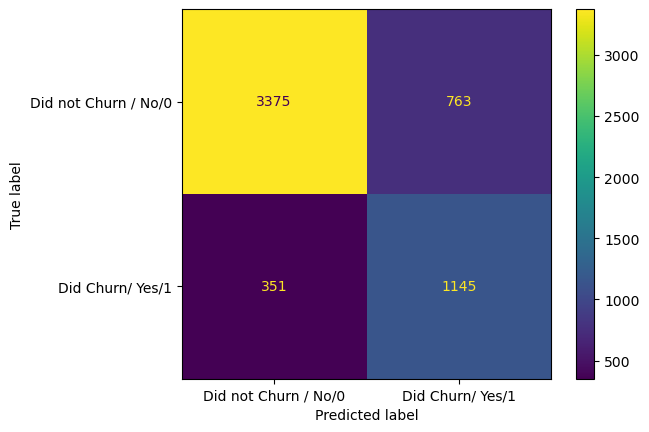

In [85]:
 plot_confusion_matrix(final_random_forest_model,x_train_normalized,
               y_train,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### Difference between both the models

In [86]:
result = {}

result['Initial Random Forest Model'] = pred_vs_actual_model_random_forest_initial.drop(columns= 'total_instances')
result['Final Random Forest Model'] = pred_vs_actual_model_random_forest_final.drop(columns= 'total_instances')

In [87]:
pd.concat(result, axis = 1)

Initial Random Forest Model       Final Random Forest Model      
             identified_right     %          identified_right     %
0                       942.0  90.9                     836.0  80.7
1                       177.0  47.5                     286.0  76.7

### Insights
* A brief peek at the components that were successfully identified reveals that the Final Model performed better than the Initial Model.
* The extra investigation discovered that the Initial model performed superbly for Train Data but poorly for Test Data, suggesting that the model was favoured and overfit, finally leading to the conclusion that the Initial model had greater Variance.
* After identifying the Optimal Value for class_weight, n_estimators, min_samples_leaf, max_features, and max_samples for our Random Forest Model, we were able to improve the performance of our model and obtain improved scores for both the train and test data.   

e Train a model using Adaboost and check the
performance of the model on train and test data


In [88]:
initial_adaboost_model = AdaBoostClassifier(random_state = 1)
initial_adaboost_model = initial_adaboost_model.fit(x_train_normalized,y_train)

In [89]:
y_pred_adaboost_initial = initial_adaboost_model.predict(x_test_normalized)

###### 1 : Scores of training and Testing Data

In [90]:
print('Score for Training Data : ',round(initial_adaboost_model.score(x_train_normalized,y_train),3))
print(' ')
print('Score for Testing Data : ',round(initial_adaboost_model.score(x_test_normalized,y_test),3))

Score for Training Data :  0.81
 
Score for Testing Data :  0.813


###### 2 :  Accuracy

In [91]:
print(accuracy_score(y_test,y_pred_adaboost_initial))

0.8126330731014905


In [92]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [93]:
pred_vs_actual_model_adaboost_initial = rightly_identified(y_test, y_pred_adaboost_initial)

In [94]:
pred_vs_actual_model_adaboost_initial

,total_instances,identified_right,%
0,1036.0,934.0,90.2
1,373.0,211.0,56.6


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [95]:
print(classification_report(y_test,y_pred_adaboost_initial))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



###### 4 : Confusion Matrix

### For Test Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


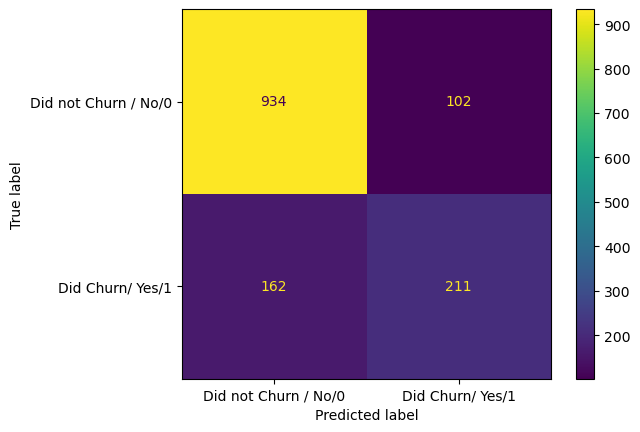

In [96]:
 plot_confusion_matrix(initial_adaboost_model,x_test_normalized,
               y_test,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### For Train Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


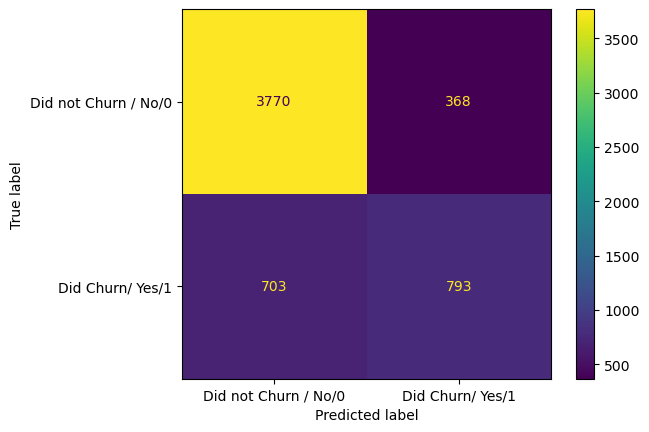

In [97]:
 plot_confusion_matrix(initial_adaboost_model,x_train_normalized,
               y_train,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

.f Use grid search and improve the performance of the
Adaboost model , check the performance of the model on
train and test data , provide the differences observed in
performance in Q3.e and Q3.f


#### Note :
               
    The size of samples is huge so the processing time of the crossvalidation/
    Gridsearch might take some time ( particularly between 30 min - 45 min)

In [98]:
base_estimator = DecisionTreeClassifier(max_depth=1)
final_adaboost_model = AdaBoostClassifier(base_estimator= initial_adaboost_model, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],  
    'learning_rate': [0.1, 0.5, 1.0, 1.5]  
}

grid_search = GridSearchCV(estimator=final_adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_normalized, y_train)

# Get the best hyperparameters from the Grid Search
best_n_estimators = grid_search.best_params_['n_estimators']
best_learning_rate = grid_search.best_params_['learning_rate']
print("Best n_estimators:", best_n_estimators)
print("Best learning_rate:", best_learning_rate)


Best n_estimators: 200
Best learning_rate: 0.1


##### This might take a minute!

In [99]:
final_adaboost_model = AdaBoostClassifier(base_estimator = initial_adaboost_model,
                                               n_estimators = 200,random_state = 42,
                                                learning_rate = 0.1)
final_adaboost_model = final_adaboost_model.fit(x_train,y_train)

In [100]:
y_pred_adaboost_final = final_adaboost_model.predict(x_test_normalized)

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


###### 1 : Scores of training and Testing Data

In [101]:
print('Score for Training Data : ',round(final_adaboost_model.score(x_train_normalized,y_train),3))
print(' ')
print('Score for Testing Data : ',round(final_adaboost_model.score(x_test_normalized,y_test),3))

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Score for Training Data :  0.734
 


C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Score for Testing Data :  0.735


###### 2 :  Accuracy

In [102]:
print(accuracy_score(y_test,y_pred_adaboost_final))

0.7352732434350603


In [103]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [104]:
pred_vs_actual_model_adaboost_final = rightly_identified(y_test, y_pred_adaboost_final)

In [105]:
pred_vs_actual_model_adaboost_final

,total_instances,identified_right,%
0,1036.0,1036.0,100.0
1,373.0,NaN,0.0


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [106]:
print(classification_report(y_test,y_pred_adaboost_final))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### 4 : Confusion Matrix

### For Test Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


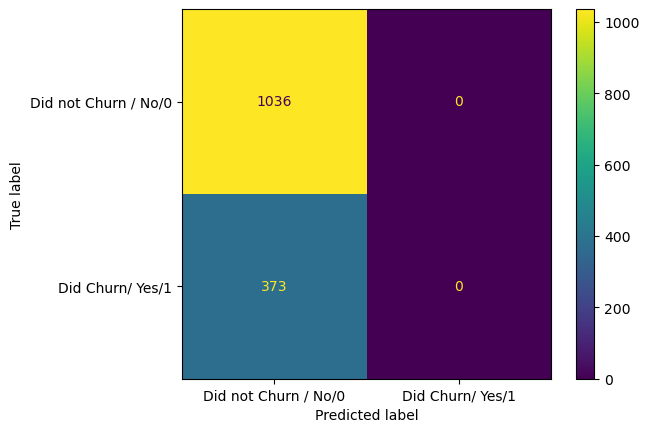

In [107]:
 plot_confusion_matrix(final_adaboost_model,x_test_normalized,
               y_test,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### For Train Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


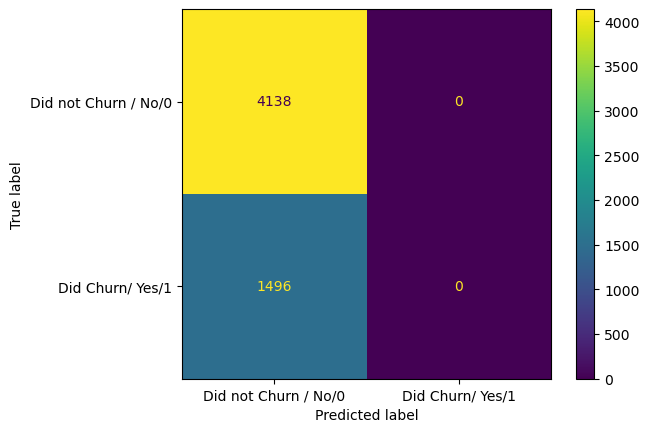

In [108]:
 plot_confusion_matrix(final_adaboost_model,x_train_normalized,
               y_train,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### Difference between both the models

In [109]:
result = {}

result['Initial AdaBoost Model'] = pred_vs_actual_model_adaboost_initial.drop(columns= 'total_instances')
result['Final AdaBoost Model'] = pred_vs_actual_model_adaboost_final.drop(columns= 'total_instances')

In [110]:
pd.concat(result, axis = 1)

Initial AdaBoost Model       Final AdaBoost Model       
        identified_right     %     identified_right      %
0                  934.0  90.2               1036.0  100.0
1                  211.0  56.6                  NaN    0.0

### Insights
* Overall,on the basis of Scores/Accuracy it seems that the initial model performed wrll for train data than test data.
* The Final Model fared better than the Initial Model for 0s and miserably when it came to the Initial Model, according to a quick glance at the components that were properly identified.
* Additional research revealed that the Initial model performed very well for Test Data but not well for Train Data.
* We were able to manage a respectable performance for our model and obtain sufficient scores for both the train and test data after determining the Optimal Value for n_estimators and learning_rate for our AdaBoost Model Model.   

g Train a model using GradientBoost and check the
performance of the model on train and test data


In [111]:
initial_gradientboost_model = GradientBoostingClassifier(random_state = 1)
initial_gradientboost_model = initial_gradientboost_model.fit(x_train_normalized,y_train)

In [112]:
y_pred_gradientboost_initial = initial_gradientboost_model.predict(x_test_normalized)

###### 1 : Scores of training and Testing Data

In [113]:
print('Score for Training Data : ',round(initial_gradientboost_model.score(x_train_normalized,y_train),3))
print(' ')
print('Score for Testing Data : ',round(initial_gradientboost_model.score(x_test_normalized,y_test),3))

Score for Training Data :  0.825
 
Score for Testing Data :  0.811


###### 2 :  Accuracy

In [114]:
print(accuracy_score(y_test,y_pred_gradientboost_initial))

0.8112136266855926


In [115]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [116]:
pred_vs_actual_model_gradient_initial = rightly_identified(y_test, y_pred_gradientboost_initial)

In [117]:
pred_vs_actual_model_gradient_initial

,total_instances,identified_right,%
0,1036.0,934.0,90.2
1,373.0,209.0,56.0


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [118]:
print(classification_report(y_test,y_pred_gradientboost_initial))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



###### 4 : Confusion Matrix

### For Test Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


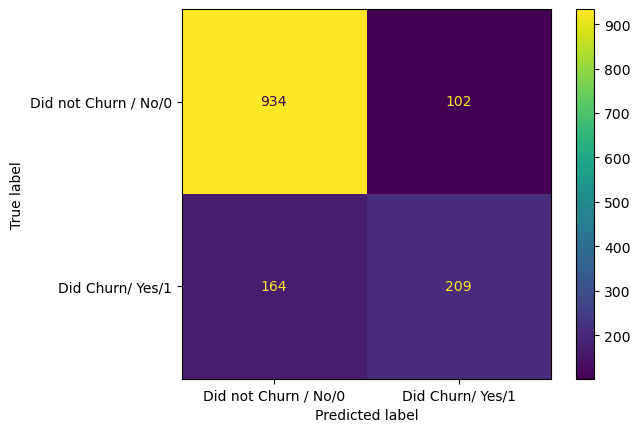

In [119]:
 plot_confusion_matrix(initial_gradientboost_model,x_test_normalized,
               y_test,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### For Train Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


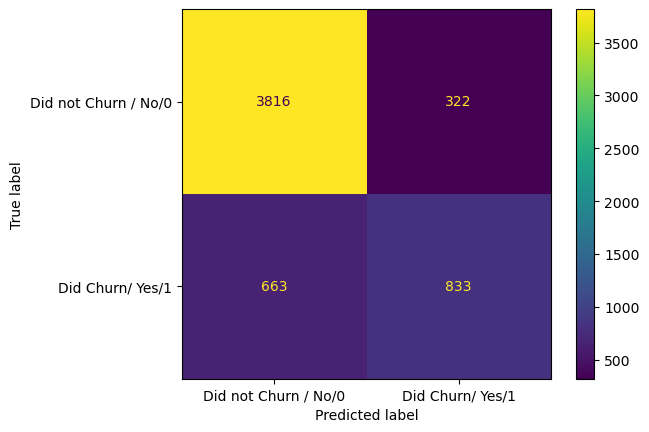

In [120]:
 plot_confusion_matrix(initial_gradientboost_model,x_train_normalized,
               y_train,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

h Use grid search and improve the performance of the
GradientBoost model , check the performance of the model
on train and test data , provide the differences observed in
performance in Q3.g and Q3.h


#### Note :
               
    The size of samples is huge so the processing time of the crossvalidation/
    Gridsearch might take some time ( particularly between 45 min - 60 min)

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
rf_estimator_weighted = GradientBoostingClassifier(random_state=42)
parameters = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.1, 0.5, 1.0, 1.5]
}
scorer = metrics.make_scorer(metrics.recall_score)
grid_search = GridSearchCV(rf_estimator_weighted, parameters, scoring=scorer, cv=5)
grid_search = grid_search.fit(x_train_normalized, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_learning_rate = grid_search.best_params_['learning_rate']
print("Optimal n_estimators:", best_n_estimators)
print("Optimal learning_rate:", best_learning_rate)


Optimal n_estimators: 100
Optimal learning_rate: 0.1


In [122]:
max_features_ideal =  np.arange(0.2, 0.7, 0.1)
param_grid = {
    'max_features': max_features_ideal
}

optimal_parameters = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0,
)
optimal_parameters.fit(x_train_normalized, y_train)

print("Optimal max_features:",optimal_parameters.best_params_)

Optimal max_features: {'max_features': 0.2}


In [123]:
max_depth_values = np.arange(1, 21)

gini_loop_values = []

for max_depth_val in max_depth_values:
    df = GradientBoostingClassifier(random_state=42,
                                max_depth=max_depth_val)
    scores = cross_val_score(df, x_train_normalized, y_train, cv=5)
    gini_loop_values.append([max_depth_val, np.mean(scores), np.std(scores)])

results = pd.DataFrame(gini_loop_values, columns=['max_depth', 'mean_accuracy', 'std'])

parameter_grid = {
    'max_depth': results['max_depth'].values
}

optimal_parameters = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=parameter_grid,
    cv=5,
    scoring='accuracaay',
    verbose=0,
)
optimal_parameters.fit(x_train_normalized, y_train)

print("Optimal max_depth:",optimal_parameters.best_params_)

Optimal max_depth: {'max_depth': 3}


In [124]:
final_gradient_model = GradientBoostingClassifier(max_depth = 3,random_state = 42,
                                                  max_features = 0.2,n_estimators = 100,
                                                learning_rate = 0.1 )
final_gradient_model.fit(x_train_normalized,y_train)

GradientBoostingClassifier(max_features=0.2, random_state=42)

##### This might take a minute!

In [125]:
y_pred_gradient_final = final_gradient_model.predict(x_test_normalized)

###### 1 : Scores of training and Testing Data

In [126]:
print('Score for Training Data : ',round(final_gradient_model.score(x_train_normalized,y_train),3))
print(' ')
print('Score for Testing Data : ',round(final_gradient_model.score(x_test_normalized,y_test),3))

Score for Training Data :  0.814
 
Score for Testing Data :  0.818


###### 2 :  Accuracy

In [127]:
print(accuracy_score(y_test,y_pred_gradient_final))

0.8183108587650816


In [128]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [129]:
pred_vs_actual_model_gradient_final = rightly_identified(y_test, y_pred_gradient_final)

In [130]:
pred_vs_actual_model_gradient_final

,total_instances,identified_right,%
0,1036.0,942.0,90.9
1,373.0,211.0,56.6


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [131]:
print(classification_report(y_test,y_pred_gradient_final))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



###### 4 : Confusion Matrix

### For Test Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


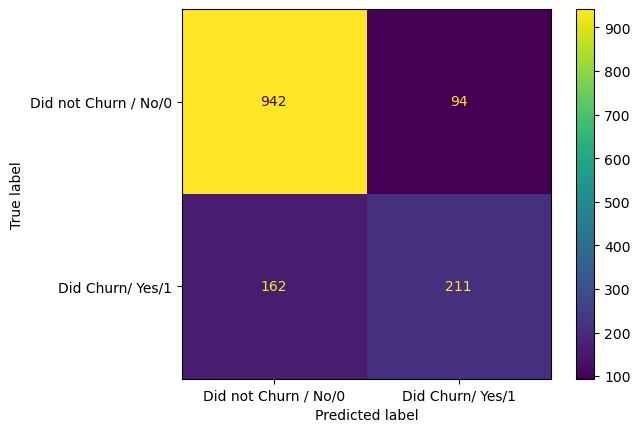

In [132]:
 plot_confusion_matrix(final_gradient_model,x_test_normalized,
               y_test,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### For Train Data

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


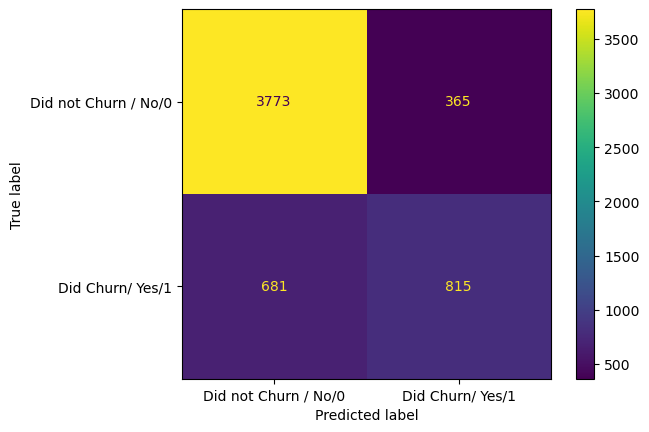

In [133]:
 plot_confusion_matrix(final_gradient_model,x_train_normalized,
               y_train,
               values_format =  'd',
               display_labels = ['Did not Churn / No/0','Did Churn/ Yes/1']);

### Difference between both the models

In [134]:
result = {}

result['Initial GradientBoost Model'] = pred_vs_actual_model_gradient_initial.drop(columns= 'total_instances')
result['Final GradientBoost Model'] = pred_vs_actual_model_gradient_final.drop(columns= 'total_instances')

In [135]:
pd.concat(result, axis = 1)

Initial GradientBoost Model       Final GradientBoost Model      
             identified_right     %          identified_right     %
0                       934.0  90.2                     942.0  90.9
1                       209.0  56.0                     211.0  56.6

### Insights
* Overall,on the basis of Scores/Accuracy it seems that the initial model as well as the final model performed equally well for train data than test data.
* The Final Model a bit better than the Initial Model for 0s as well as 1s according to a quick glance at the components that were properly identified.
* We were able to manage a respectable performance for our model and obtain sufficient scores for both the train and test data after determining the Optimal Value for max_depth,n_estimators,max_features and learning_rate for our Gradient Boost Model. 

* i     Provide detailed analysis of the below steps

1 :  Compare the performance of each model in train
stage and test stage

2 :  Provide your observation on which model performed
the best

3 : Provide your reasoning on why the model performed
best

4 : Provide your final conclusion on your observation

1

In [136]:
def metrics_score(model, flag=True):
    score_list=[] 
    pred_train = model.predict(x_train_normalized)
    pred_test = model.predict(x_test_normalized)
    train_acc = model.score(x_train_normalized, y_train)
    test_acc = model.score(x_test_normalized, y_test)
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag:
        print("Accuracy on training set:", train_acc)
        print("Accuracy on test set:", test_acc)
        print("Recall on training set:", train_recall)
        print("Recall on test set:", test_recall)
        print("Precision on training set:", train_precision)
        print("Precision on test set:", test_precision)
    
    return score_list # returning the list with train and test scores


In [137]:
all_models = [initial_decision_tree_model, final_decision_tree_model, initial_random_forest_model,
          final_random_forest_model, initial_adaboost_model, final_adaboost_model,
          initial_gradientboost_model, final_gradient_model]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for model in all_models:
    j = metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))


C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control 

In [138]:
comparison_frame = pd.DataFrame({'Model':['initial_decision_tree_model','final_decision_tree_model'
                                          ,'initial_random_forest_model','final_random_forest_model',
                                          'initial_adaboost_model','final_adaboost_model',
                                          'initial_gradientboost_model','final_gradient_model'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,initial_decision_tree_model,1.00,0.73,1.00,0.49,1.00,0.50
1,final_decision_tree_model,0.80,0.81,0.47,0.50,0.68,0.68
2,initial_random_forest_model,1.00,0.79,1.00,0.47,1.00,0.65
3,final_random_forest_model,0.80,0.80,0.77,0.77,0.60,0.59
4,initial_adaboost_model,0.81,0.81,0.53,0.57,0.68,0.67
5,final_adaboost_model,0.73,0.74,0.00,0.00,0.00,0.00
6,initial_gradientboost_model,0.83,0.81,0.56,0.56,0.72,0.67
7,final_gradient_model,0.81,0.82,0.54,0.57,0.69,0.69


### Insights : 
* 2 : My observations show that initial_adaboost_model, final_gradient_model, and initial_gradient_model are the main contenders for the top spot. However, after looking at the stats, I believe that final_gradient_model fared the best.
* 3 : In addition to providing positive test-train results, the final gradient model outperformed the other models in terms of sensitivity and precision measures.
* 4 : In order to draw a final conclusion, I will note that some of the initial models may have produced poor results, while others may have improved, and of the remaining models, only the final_gradient_model should be regarded as the model that best fits the data and produces the best results overall.
